In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# from sw_utilities import tukeyTest
from scipy.stats import percentileofscore
from sw_tracking import get_cell_division_tracking_df, normalize_time
from sw_plotting import plot_tracks_2D_colorcode, plot_tracks_2D, plot_tracks_3D
from sw_plotting import plot_cum_dist, plot_dist

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# font = {'family' : 'Arial',
#         'size'   : 7}
# matplotlib.rc('font', **font)
# plt.rcParams['svg.fonttype'] = 'none'

# make a folder to store figures if not already there
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# Read in raw or combined (if exists) cell division tracking data
df = get_cell_division_tracking_df()

# Read in the 3D polylines data to plot mesh surface at beginning and ending time points
polyline_df_xy = pd.read_csv('../data/3D-polylines-for-mesh/polyline_df_xy.csv')
polyline_df_yz = pd.read_csv('../data/3D-polylines-for-mesh/polyline_df_yz.csv')

# Add normalized time column
df = normalize_time(df)

# Filter out slow and fast *returning* (not speed) cell tracks
df_fast = df[df.anaphase_to_surface_return<240]
df_slow = df[df.anaphase_to_surface_return>=240]

# Get a list of slow *returning* (not speed) cell tracks for track highlighting
slow_tracks = df_slow.track_id.unique()

A combined csv file exists! Data frame will be directly read from this csv file.
2021-01-13 10:30:08,634 - INFO - NumExpr defaulting to 8 threads.


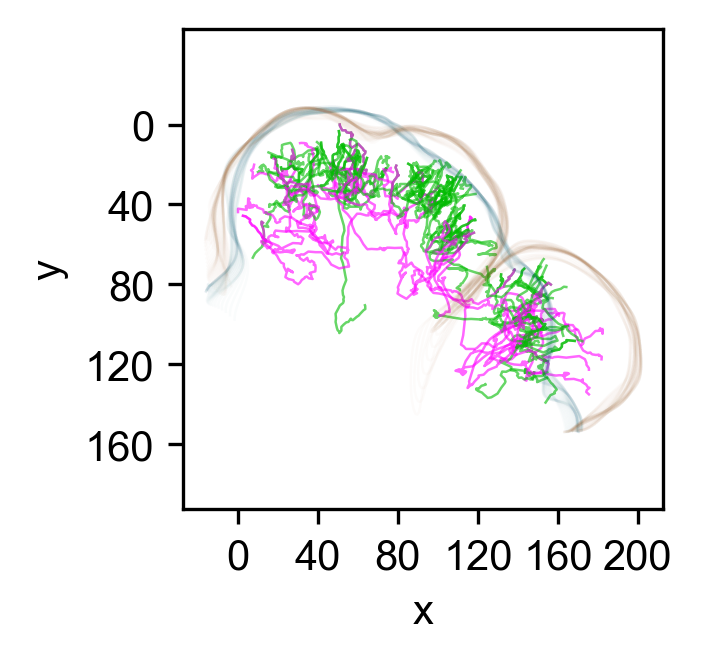

In [3]:
output_prefix = '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-'
output_filename = '../jupyter_figures/' + output_prefix + 'highlight-slow-returning-tracks-outline-30um-z.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D(df, output_fig_path=output_filename,
               tracks_highlight=slow_tracks,
               line_color='#00BB00',
               uniform_line_width=True,
               plot_xy_outlines=True, polyline_df_xy=polyline_df_xy, z_range=15,
               x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40))

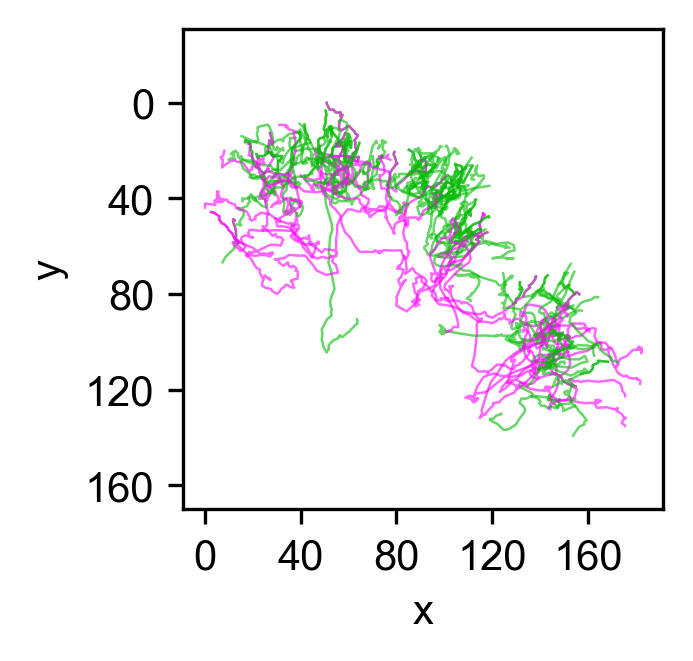

In [4]:
output_prefix = '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-'
output_filename = '../jupyter_figures/' + output_prefix + 'highlight-slow-returning-tracks.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D(df, output_fig_path=output_filename,
               tracks_highlight=slow_tracks,
               line_color='#00BB00',
               uniform_line_width=True,
               x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40))

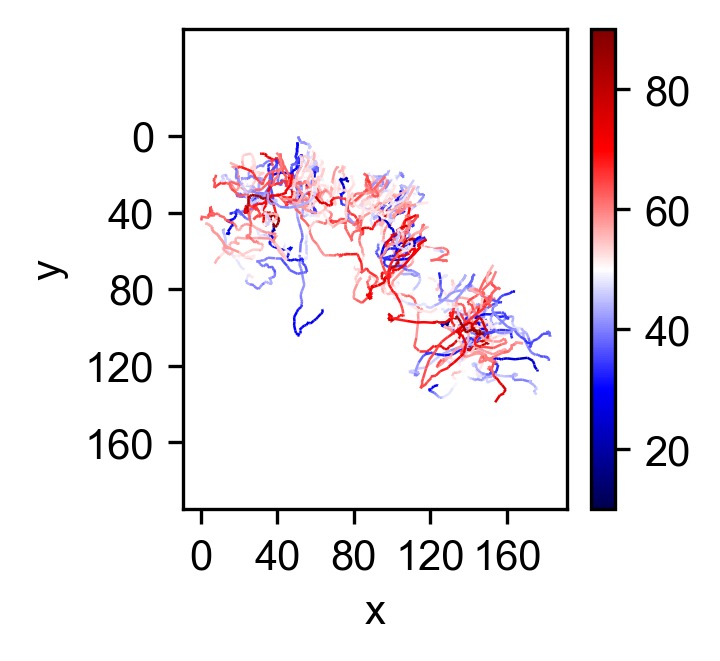

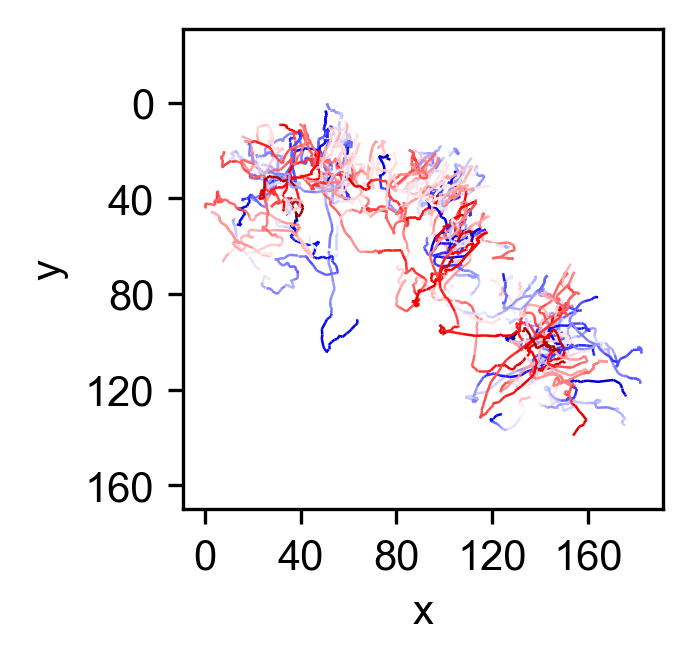

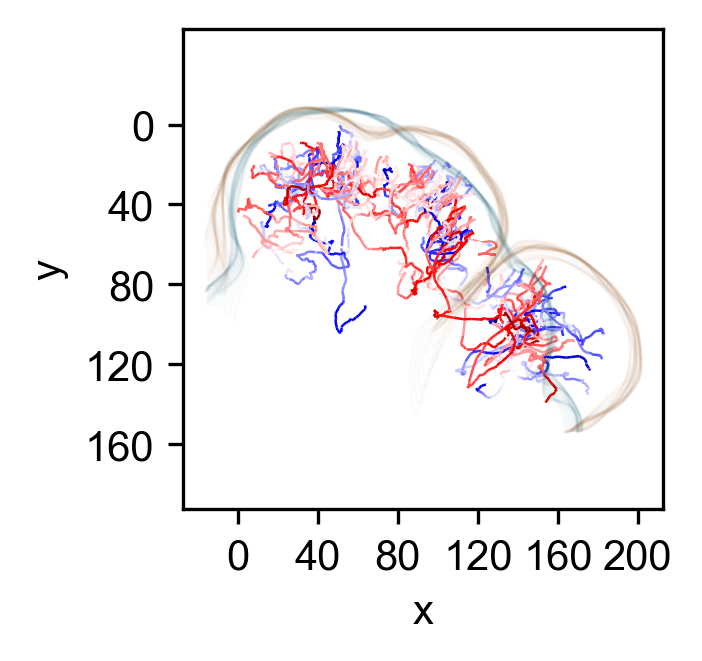

In [8]:
output_prefix = '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-'

output_filename = '../jupyter_figures/' + output_prefix + 'color-code-z-with-color_bar.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='z', color_map='seismic',
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=10, norm_max=90)

output_filename = '../jupyter_figures/' + output_prefix + 'color-code-z.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='z', color_map='seismic', color_bar=False,
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=10, norm_max=90)

output_filename = '../jupyter_figures/' + output_prefix + 'color-code-z-with-outline-30um-z.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='z', color_map='seismic', color_bar=False,
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         plot_xy_outlines=True, polyline_df_xy=polyline_df_xy, z_range=15,
                         norm_min=10, norm_max=90)

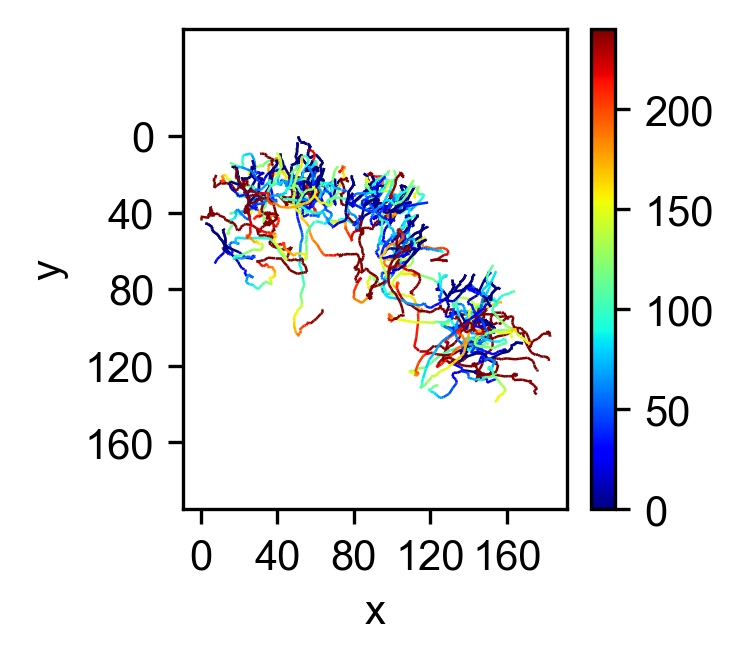

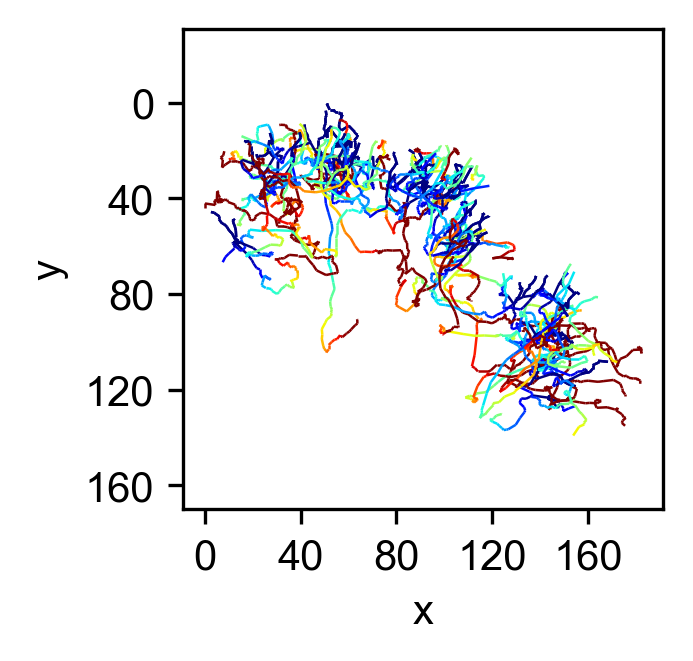

In [6]:
output_prefix = '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-'
output_filename = '../jupyter_figures/' + output_prefix + 'color-code-time-with-color_bar.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='time', color_map='jet',
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=0, norm_max=240)

output_filename = '../jupyter_figures/' + output_prefix + 'color-code-time.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='time', color_map='jet', color_bar=False,
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=0, norm_max=240)

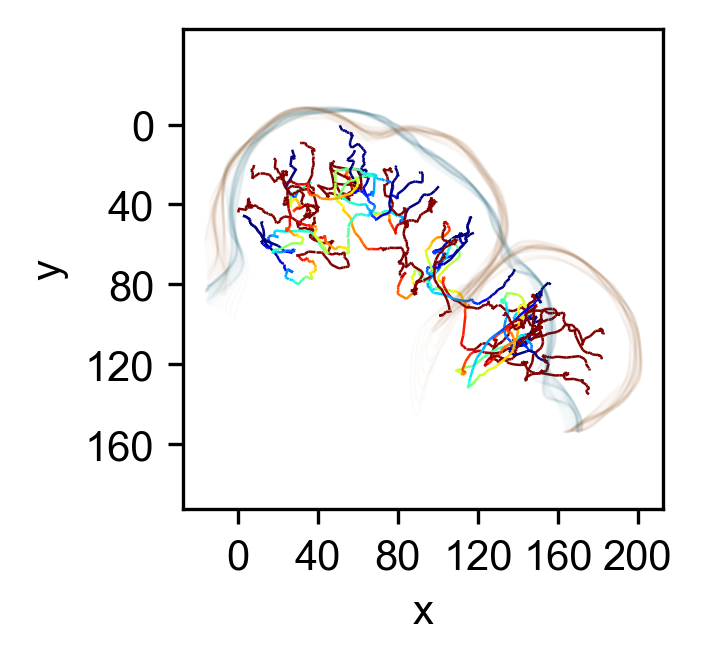

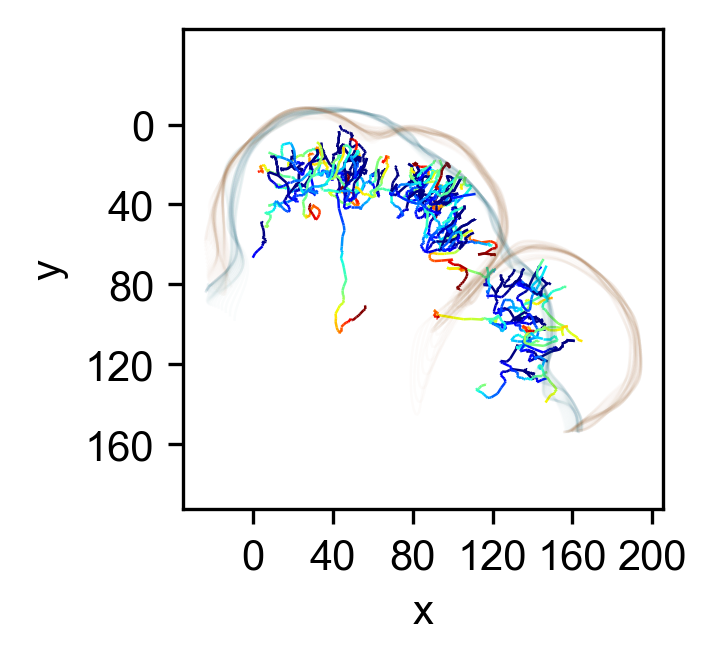

In [20]:
output_prefix = '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-'

norm_min = 0
norm_max = 240
colorcode = 'time'
color_map = 'jet'

output_filename = '../jupyter_figures/' + output_prefix + 'slow-return-tracks_' + colorcode + '_' + color_map +'.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df_slow, output_fig_path=output_filename,
                         colorcode=colorcode, color_map=color_map, color_bar=False,
                         plot_xy_outlines=True, polyline_df_xy=polyline_df_xy, z_range=15,
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=norm_min, norm_max=norm_max)

output_filename = '../jupyter_figures/' + output_prefix + 'fast-return-tracks_' + colorcode + '_' + color_map +'.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df_fast, output_fig_path=output_filename,
                         colorcode=colorcode, color_map=color_map, color_bar=False,
                         plot_xy_outlines=True, polyline_df_xy=polyline_df_xy, z_range=15,
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=norm_min, norm_max=norm_max)

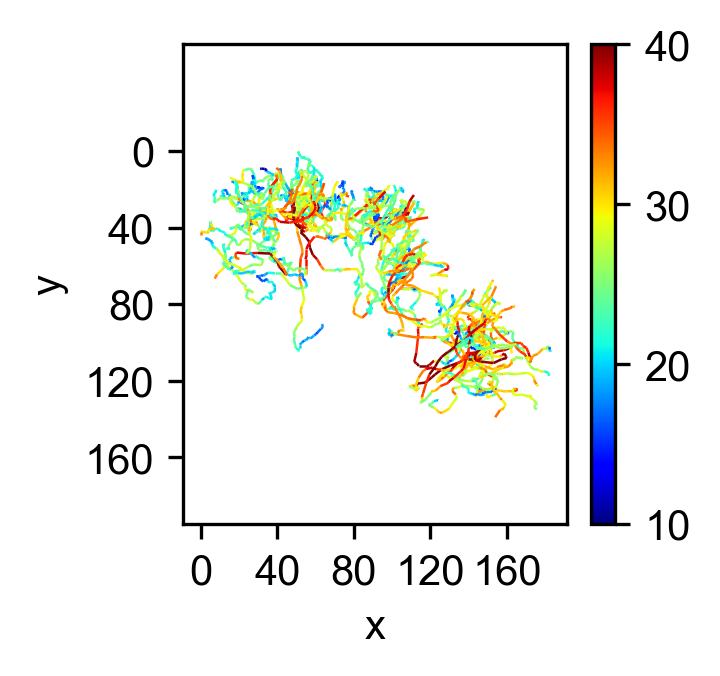

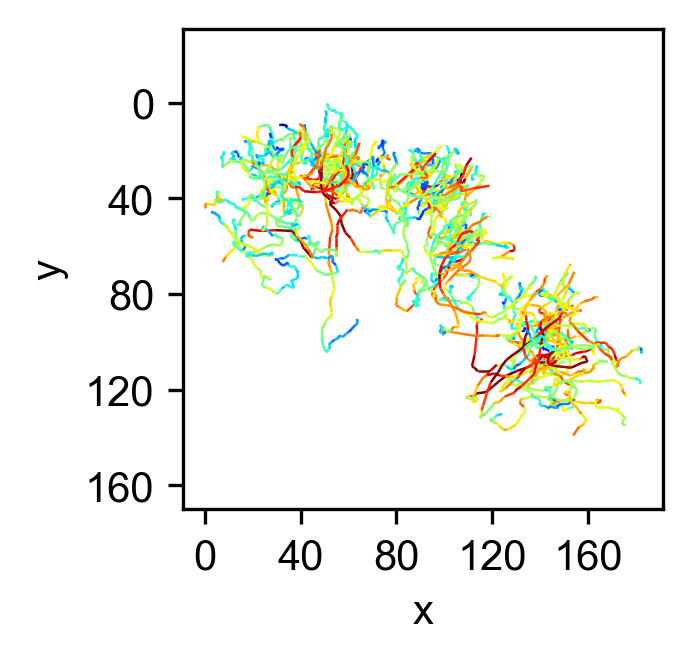

In [7]:
output_prefix = '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-'

output_filename = '../jupyter_figures/' + output_prefix + 'color-code-speed-with-color_bar.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='speed', color_map='jet',
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=10, norm_max=40)

output_filename = '../jupyter_figures/' + output_prefix + 'color-code-speed.svg'
# output_filename = None # uncomment if not saving
plot_tracks_2D_colorcode(df, output_fig_path=output_filename,
                         colorcode='speed', color_map='jet', color_bar=False,
                         x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40),
                         norm_min=10, norm_max=40)

x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0


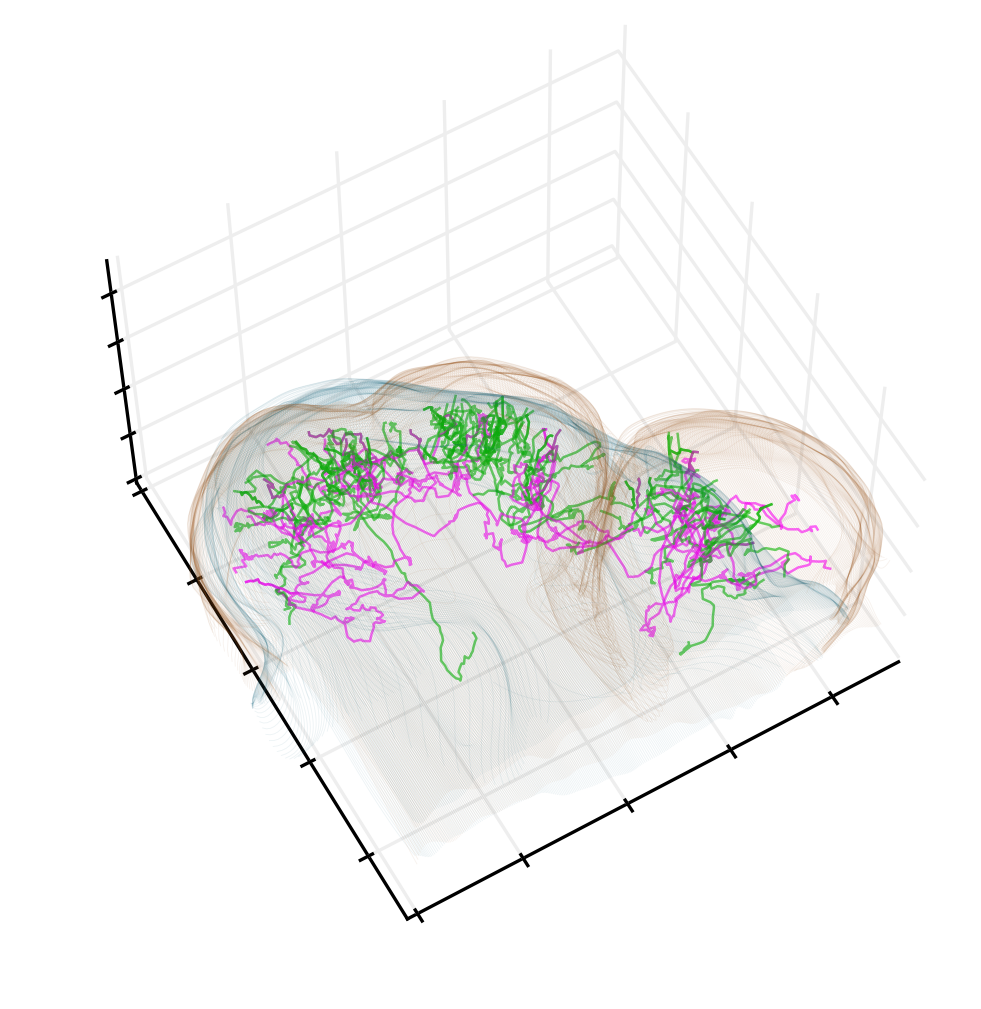

In [21]:
# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-color-by-tracks.svg'
plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=None,
               tracks_highlight=slow_tracks,
               line_color='#00BB00',
               uniform_line_width=True,
               plot_xy_polylines=True, plot_yz_polylines=True,
               elevation=60, azimuth=60,
               draw_spot_start=False, draw_spot_end=False)

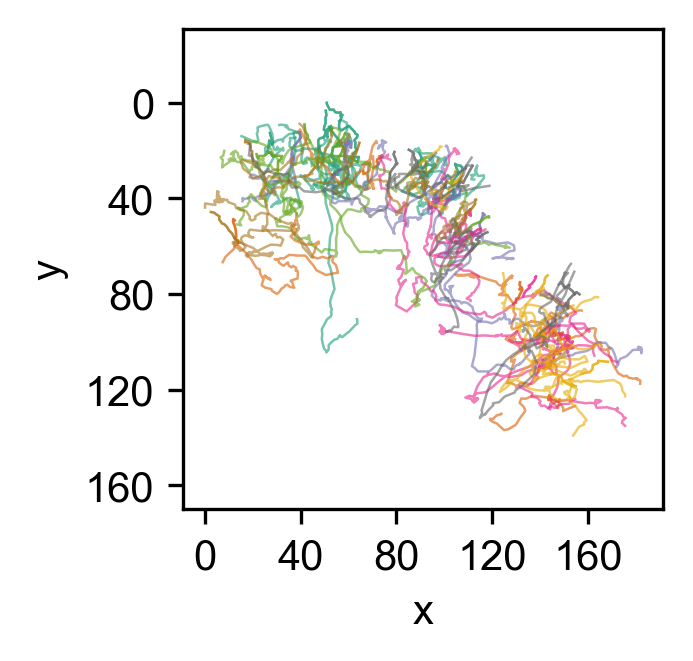

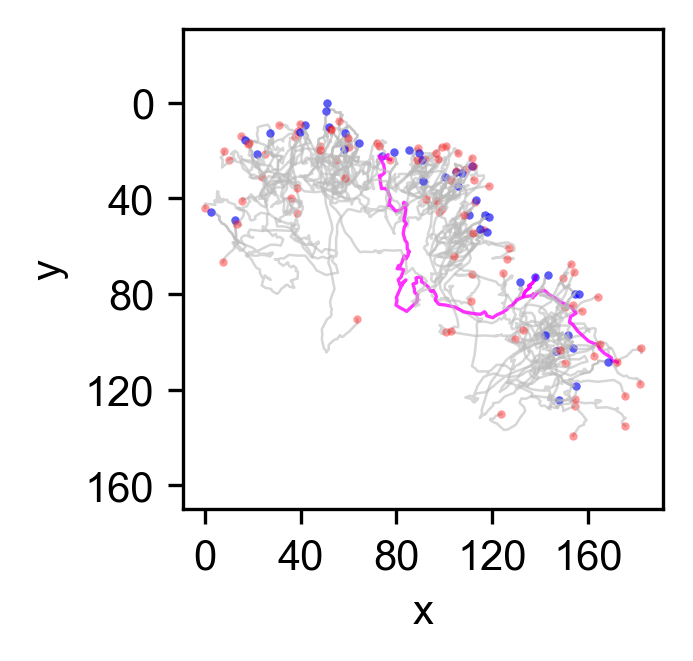

In [3]:
# Uncomment to make 2D plots used in figures

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-all-tracks.svg'
# plot_tracks_2D(df, output_fig_path=output_filename,
#                x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40))

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-2D-highlight-tracks.svg'
# plot_tracks_2D(df, output_fig_path=output_filename, tracks_highlight=[110, 121],
#                x_ticks=np.arange(0, 201, 40), y_ticks=np.arange(0, 201, 40), 
#                line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)


x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0
x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0
x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0
x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0
x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0
x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0
x, y, z min:  16.5850023219 26.5566703846 12.0
x, y, z max:  199.020027863 165.695023197 88.0


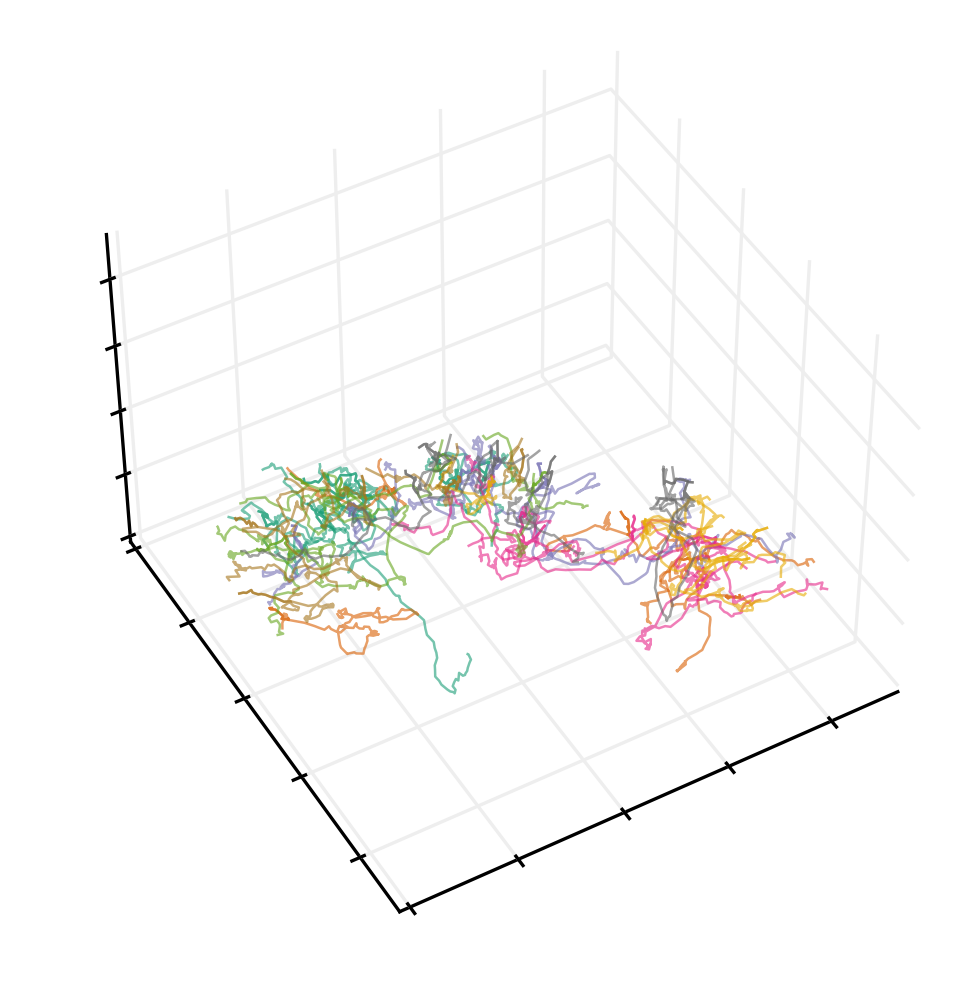

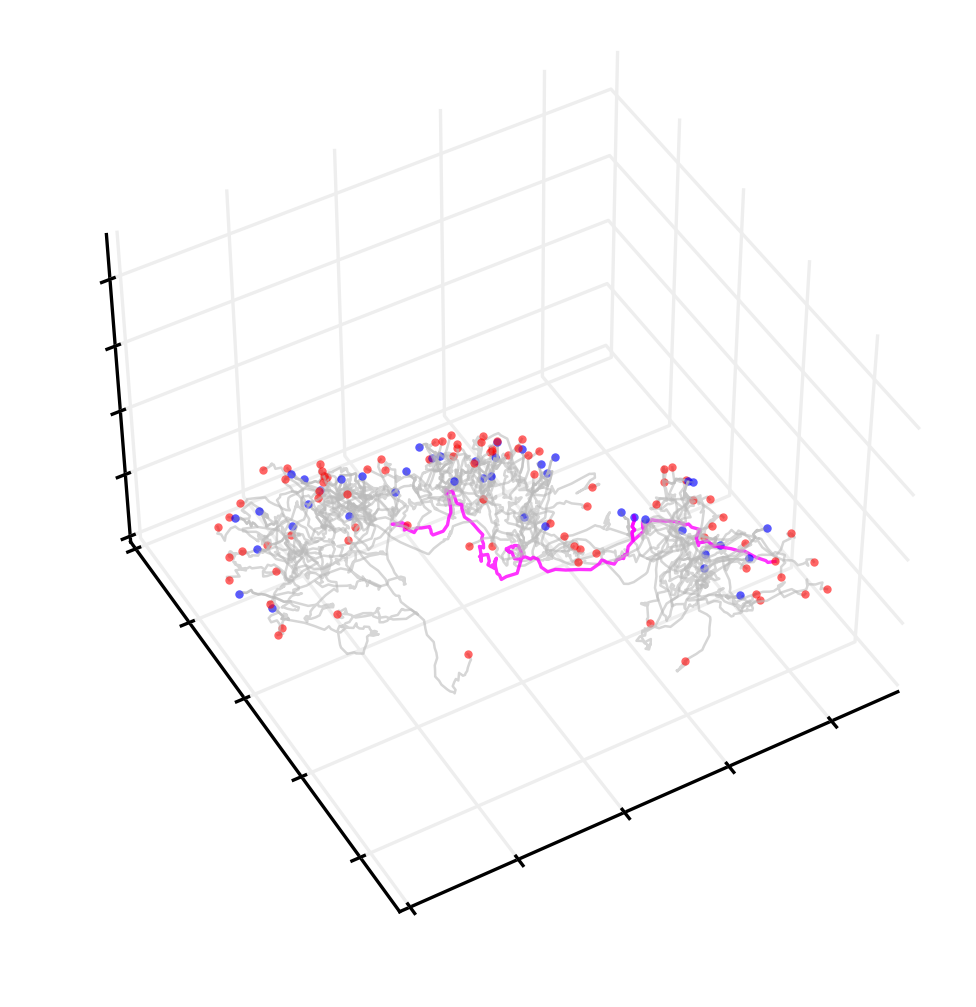

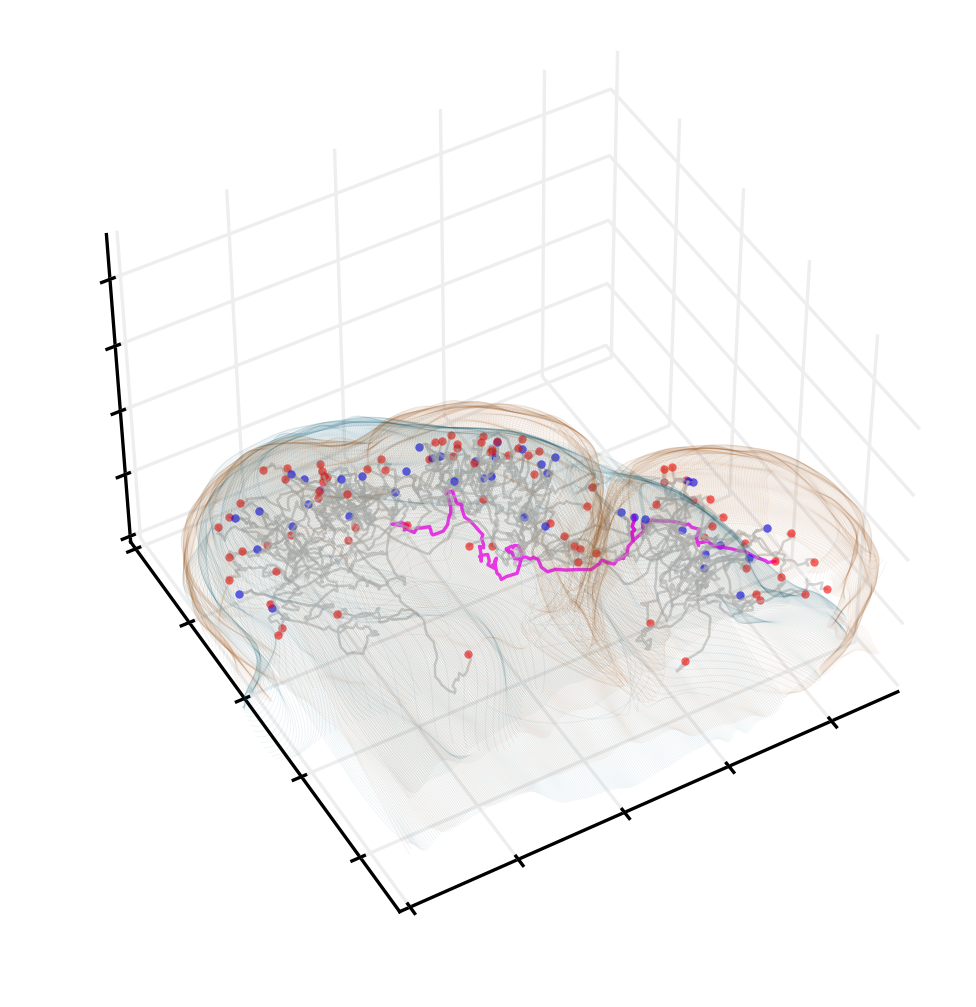

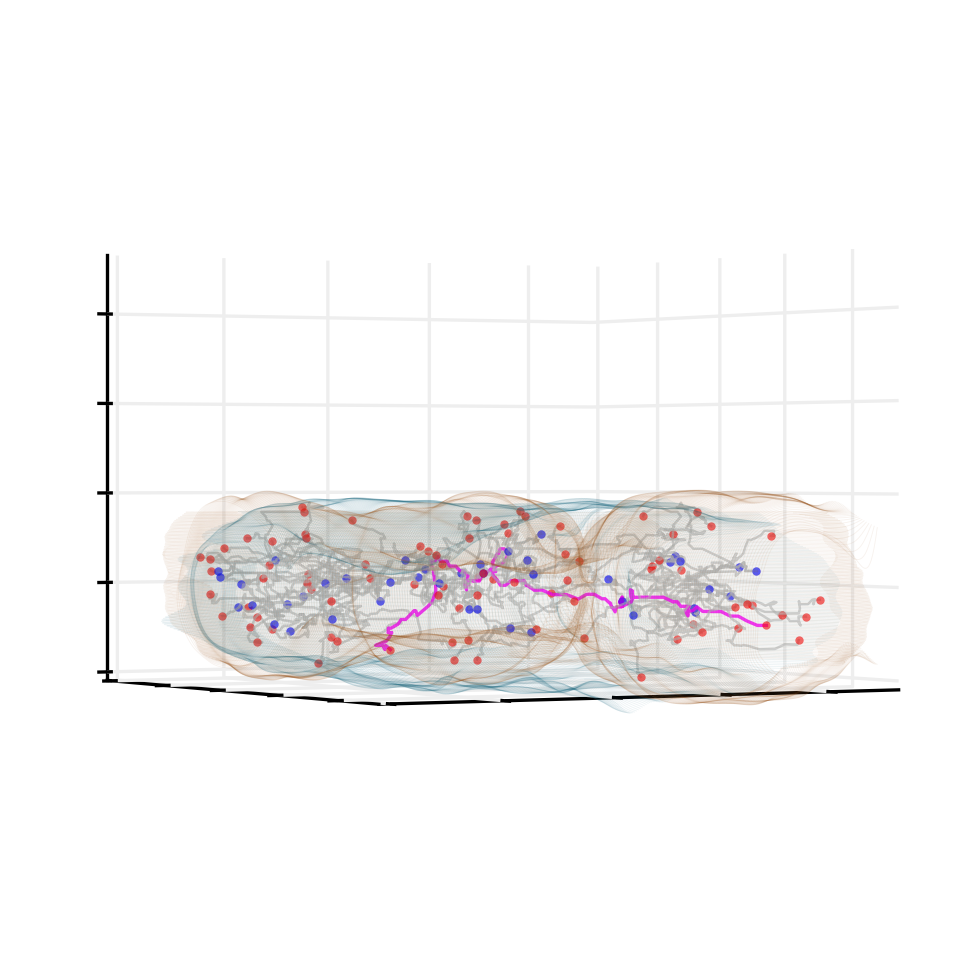

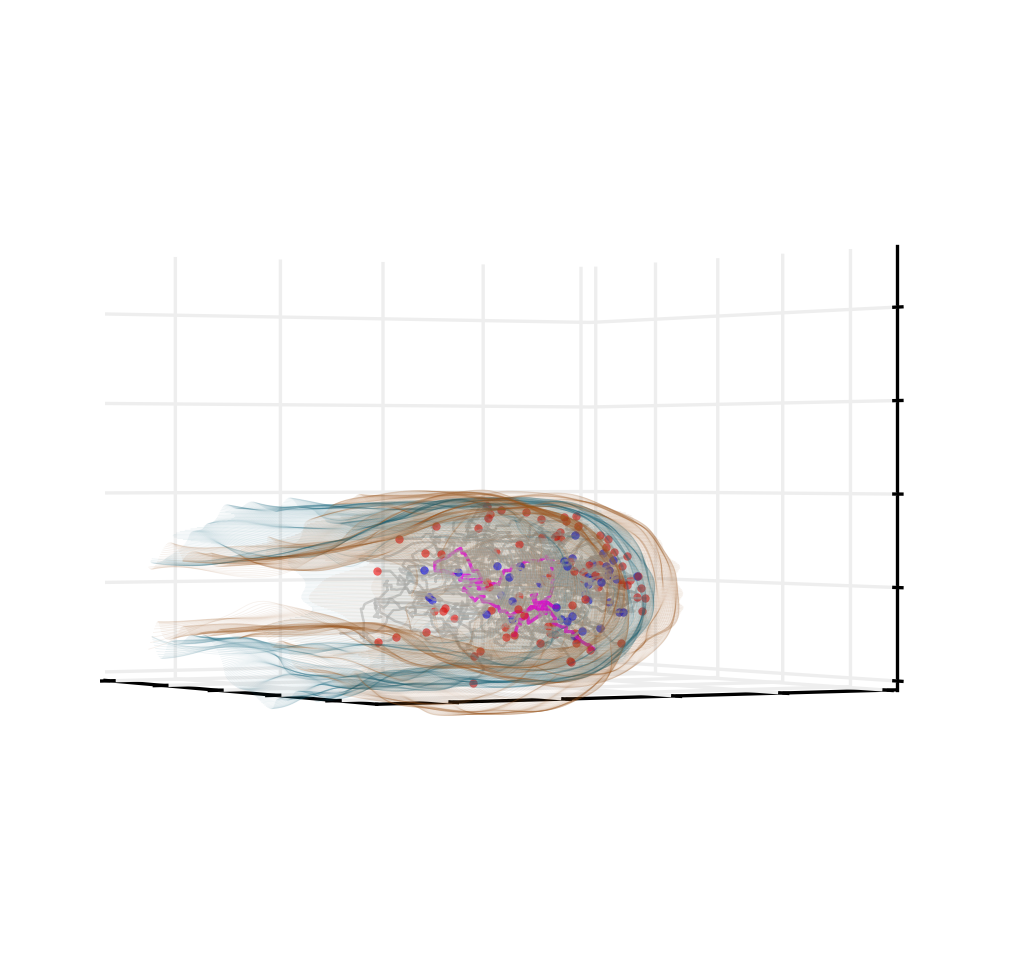

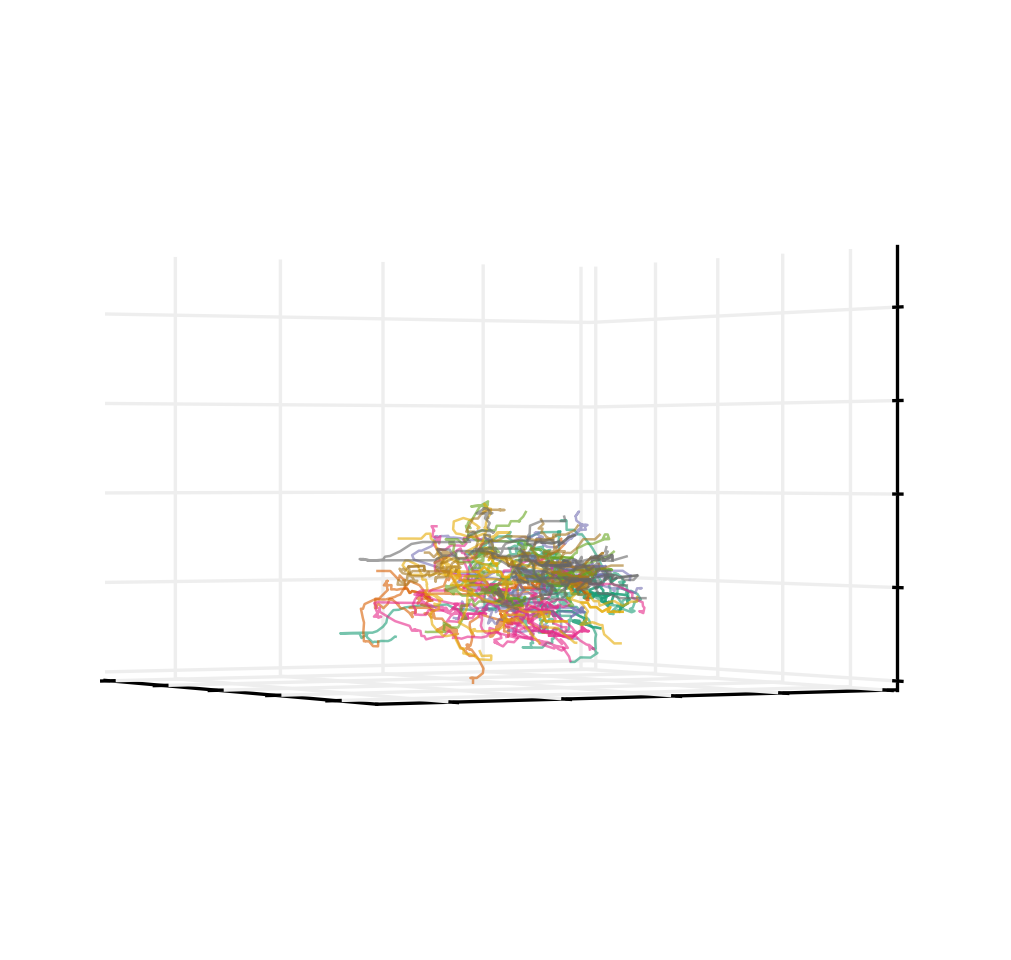

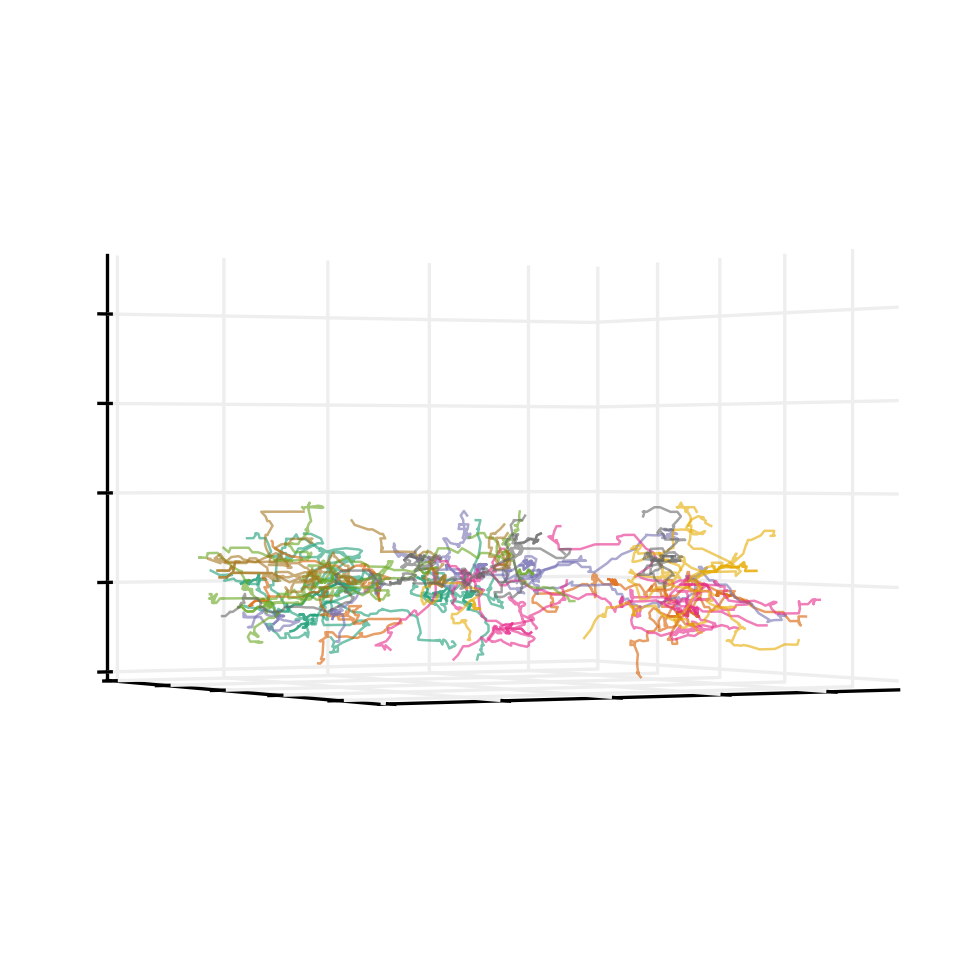

In [9]:
### --- uncomment code below to make all 3D plots used in the figures --- ###

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-color-by-tracks.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename,
#                draw_spot_start=False, draw_spot_end=False)

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename, tracks_highlight=[110, 121],
#                line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight-surfaces.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename, tracks_highlight=[110, 121],
#                plot_xy_polylines=True, plot_yz_polylines=True,
#                line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight-surfaces-0-60.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename, tracks_highlight=[110, 121],
#                plot_xy_polylines=True, plot_yz_polylines=True,
#                elevation=0, azimuth=60,
#                line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight-surfaces-0-150.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename, tracks_highlight=[110, 121],
#                plot_xy_polylines=True, plot_yz_polylines=True,
#                elevation=0, azimuth=150,
#                line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-color-by-tracks-side-view-150.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename,
# #                plot_xy_polylines=True, plot_yz_polylines=True,
#                elevation=0, azimuth=150,
#                draw_spot_start=False, draw_spot_end=False)

# output_filename = '../jupyter_figures/' + '180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-color-by-tracks-side-view-60.svg'
# plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename,
# #                plot_xy_polylines=True, plot_yz_polylines=True,
#                elevation=0, azimuth=60,
#                draw_spot_start=False, draw_spot_end=False)


In [10]:
##### To make movies of a rotating plot

# for elevation_angle in np.arange(90, -1, -5):
#     output_filename = '../jupyter_figures/'+'180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight-surfaces-'+'{:03d}'.format(elevation_angle)+'-060.tif'
#     plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename,
#                    plot_xy_polylines=True, plot_yz_polylines=True,
#                    fig_width=3, fig_height=3, fig_dpi=600,
#                    elevation=elevation_angle, azimuth=60, axis_off=True,
#                    line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)

# for elevation_angle in np.arange(90, -1, -5):
#     output_filename = '../jupyter_figures/'+'180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight-surfaces-axis-on-'+'{:03d}'.format(elevation_angle)+'-060.tif'
#     plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename,
#                    plot_xy_polylines=True, plot_yz_polylines=True,
#                    fig_width=3, fig_height=3, fig_dpi=600,
#                    elevation=elevation_angle, azimuth=60, axis_off=False,
#                    line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)
    
# for azimuth_angle in np.arange(60, 241, 5):
#     output_filename = '../jupyter_figures/'+'180218-mTmGHisG-ROI1-TrackMate-exported-tracks-3D-selected-tracks-highlight-surfaces-axis-on-000-'+'{:03d}'.format(azimuth_angle)+'.tif'
#     plot_tracks_3D(df, polyline_df_xy, polyline_df_yz, output_fig_path=output_filename,
#                    plot_xy_polylines=True, plot_yz_polylines=True,
#                    fig_width=3, fig_height=3, fig_dpi=600,
#                    elevation=0, azimuth=azimuth_angle, axis_off=False,
#                    line_color='#BBBBBB', draw_spot_start=True, draw_spot_end=True)


In [11]:
# # Testing color maps of matplotlib

# from matplotlib import cm
# colors = cm.jet(np.linspace(0, 1, df.cell_division_id.nunique()))
# cell_division_id = df.cell_division_id.unique()
# colorsDict = dict( [ (cell_division_id[i], colors[i]) for i in range(len(colors)) ] )
# colorsDict['9']
# # colors = iter(cm.rainbow(np.linspace(0, 1, len(meanGFPlist))))


In [12]:
# Extract the daughter cell return time data from the combined dataframe

return_time_data = []
for track_id in df.track_id.unique():
    df_track = df[df.track_id==track_id]
    df_track.reset_index(inplace=True, drop=True)
    return_time = df_track.anaphase_to_surface_return[0]
    return_time_data.append(return_time)


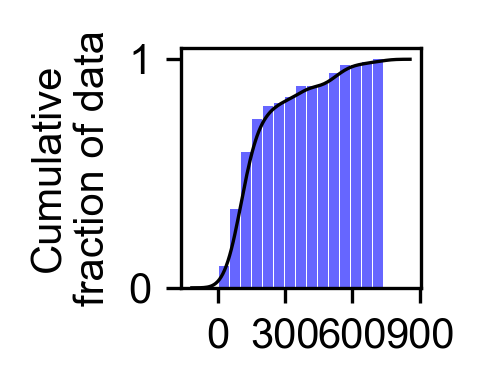

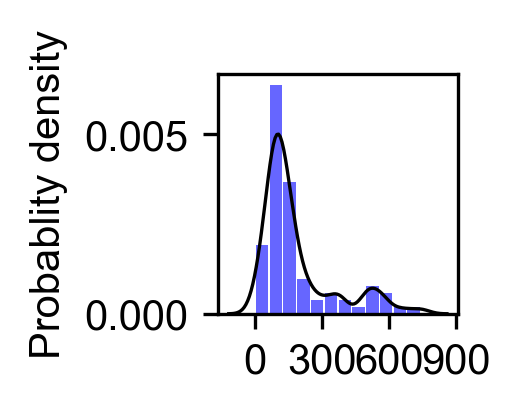

In [13]:
# dataset_prefix = '180218-mTmGHisG-2photon-cell-division-returning-time'
# output_fig_path = '../jupyter_figures/' + dataset_prefix + '-CDF.svg'
plot_cum_dist(return_time_data, n_bins=15, output_fig_path=None, x_ticks=[0,300,600,900])

# output_fig_path = '../jupyter_figures/' + dataset_prefix + '-distribution.svg'
# plot_dist(df.anaphase_to_surface_return, n_bins=12, output_fig_path=output_fig_path, x_ticks=[0,400,800])
plot_dist(return_time_data, n_bins=12, x_ticks=[0,300,600,900])


In [14]:
# Identify the percentile of 240 min (4 hours)
per_240 = percentileofscore(return_time_data, 240)
print('The percentile of 240 min is:', per_240)


The percentile of 240 min is: 79.76190476190476
